In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
df = pd.read_csv('/content/drive/MyDrive/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [248]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [249]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [250]:
#DATA CLEANING
#1.handle missing values
features = df.keys()
df[features].isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [251]:
# note: for dropping axis=1 ante column ni drop cheydam, for isna or isnull etc these functions ki maatram row wise check cheydam
nan_rows = df[df.isna().any(axis=1)]
print(nan_rows)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [252]:
df[features].isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [253]:
df['SeniorCitizen'] = df['SeniorCitizen'].map({0:"No", 1:"Yes"})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


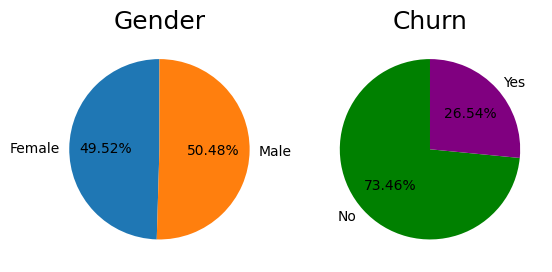

In [254]:
# data visualisation
import seaborn as sns
female = df[df['gender']=='Female'].shape[0]
male = df[df['gender']=='Male'].shape[0]
sizes = [female,male]
labels = ['Female','Male']
plt.subplot(1,2,1)
plt.title('Gender',fontsize=18)
plt.pie(sizes,labels=labels,autopct='%1.2f%%',startangle=90) # autopct='%1.1f%%' is to show perecntage on chart, startangle is to rotate the pie chart

no = df[df['Churn']=='No'].shape[0]
yes = df[df['Churn']=='Yes'].shape[0]
sizes = [no,yes]
labels = ['No','Yes']
plt.subplot(1,2,2)
plt.title('Churn',fontsize=18)
plt.pie(sizes,labels=labels,autopct='%1.2f%%',startangle=90,colors=['green','purple'])
plt.show()

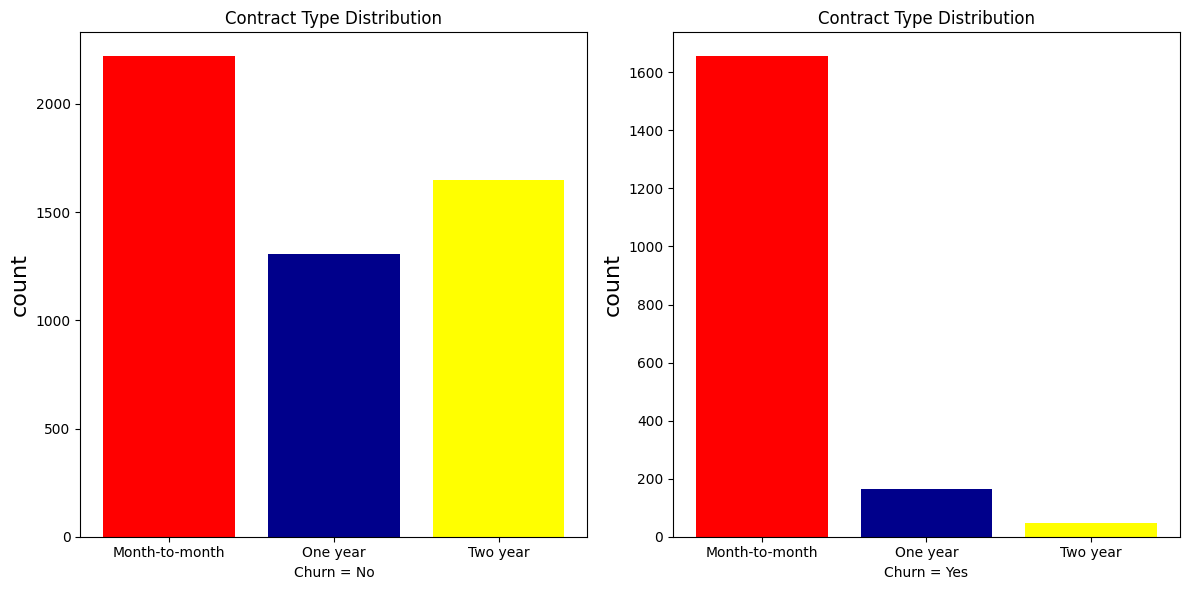

In [255]:
df.head()
mom = df[(df['Contract']=='Month-to-month') & (df['Churn']=='No')].shape[0]
oney = df[(df['Contract']=='One year') & (df['Churn']=='No')].shape[0]
twoy = df[(df['Contract']=='Two year') & (df['Churn']=='No')].shape[0]
sizes = [mom,oney,twoy]
labels = ['Month-to-month', 'One year','Two year']
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.bar(labels,sizes,color=['red','darkblue','yellow'])
plt.xlabel('Churn = No')
plt.ylabel('count',fontsize=16)
plt.title('Contract Type Distribution')

mom1 = df[(df['Contract']=='Month-to-month') & (df['Churn']=='Yes')].shape[0]
oney1 = df[(df['Contract']=='One year') & (df['Churn']=='Yes')].shape[0]
twoy1 = df[(df['Contract']=='Two year') & (df['Churn']=='Yes')].shape[0]
sizes1 = [mom1,oney1,twoy1]
plt.subplot(1,2,2)
plt.bar(labels,sizes1,color=['red','darkblue','yellow'])
plt.xlabel('Churn = Yes')
plt.ylabel('count',fontsize=16)
plt.title('Contract Type Distribution')

plt.tight_layout()
plt.show()

In [256]:
print(df['PaymentMethod'].unique())

['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


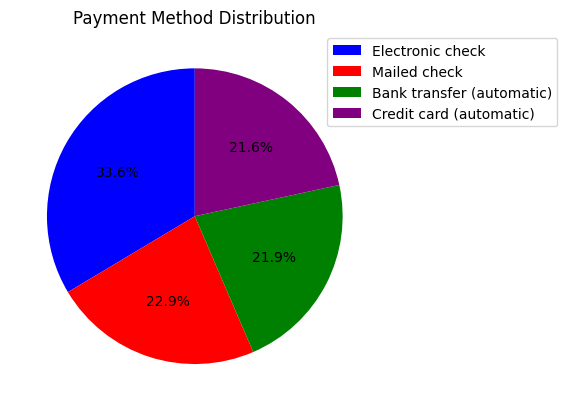

In [257]:
ec = df[df['PaymentMethod']=='Electronic check'].shape[0]
mc = df[df['PaymentMethod']=='Mailed check'].shape[0]
bt = df[df['PaymentMethod']=='Bank transfer (automatic)'].shape[0]
cc = df[df['PaymentMethod']=='Credit card (automatic)'].shape[0]
labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
sizes = [ec,mc,bt,cc]
plt.title('Payment Method Distribution')
plt.pie(sizes,labels=None,autopct="%1.1f%%",startangle=90,colors=['blue','red','green','purple'])
plt.legend(labels,loc='upper right',bbox_to_anchor=(1.5, 1)) # bbox_to_anchor=(1.5, 1) → Moves the legend slightly outside the plot for better alignment.
plt.show()

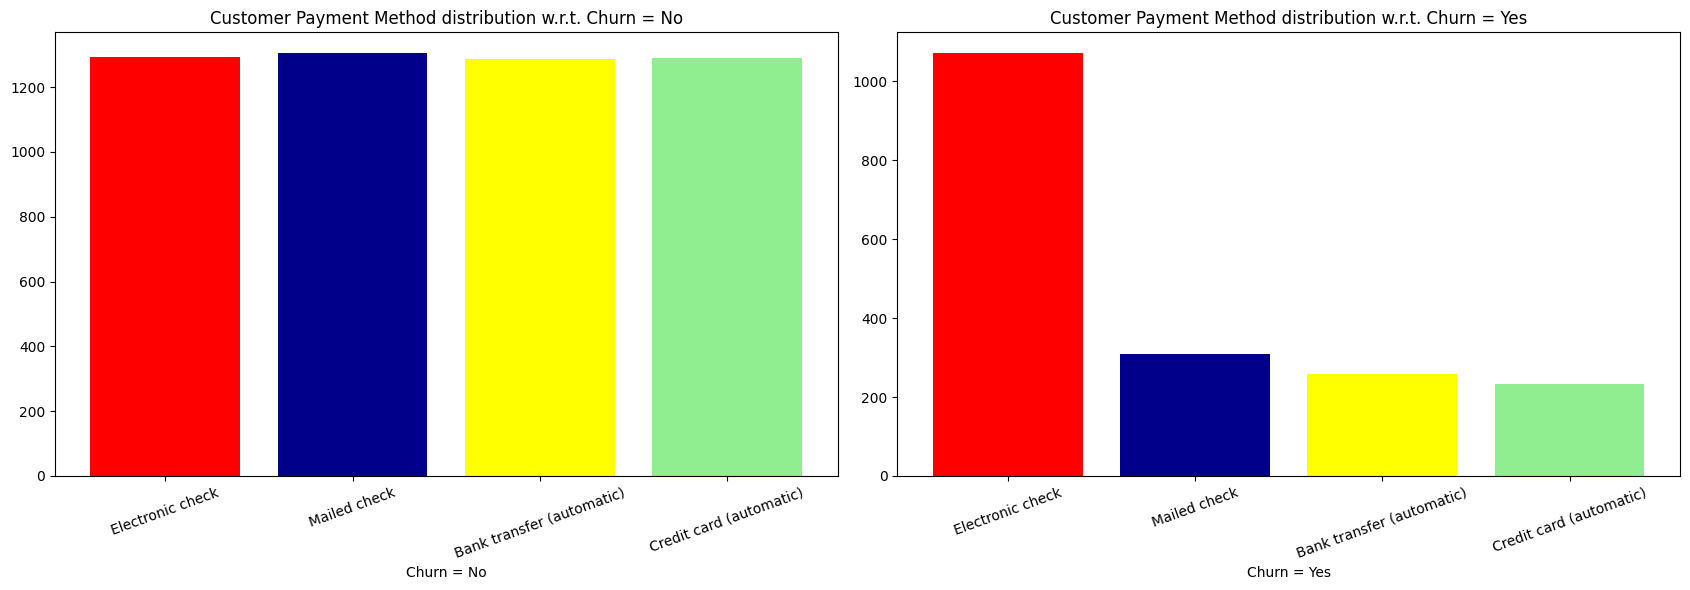

In [258]:
ec = df[(df['PaymentMethod']=='Electronic check') & (df['Churn']=='No')].shape[0]
mc = df[(df['PaymentMethod']=='Mailed check') & (df['Churn']=='No')].shape[0]
bt = df[(df['PaymentMethod']=='Bank transfer (automatic)') & (df['Churn']=='No')].shape[0]
cc = df[(df['PaymentMethod']=='Credit card (automatic)') & (df['Churn']=='No')].shape[0]

sizes = [ec,mc,bt,cc]
plt.figure(figsize=(17,6))

plt.subplot(1,2,1)
plt.bar(labels,sizes,color=['red','darkblue','yellow','lightgreen'])
plt.xlabel('Churn = No',fontsize=10)
plt.xticks(rotation=20, fontsize=10)
plt.title('Customer Payment Method distribution w.r.t. Churn = No')

ec1 = df[(df['PaymentMethod']=='Electronic check') & (df['Churn']=='Yes')].shape[0]
mc1 = df[(df['PaymentMethod']=='Mailed check') & (df['Churn']=='Yes')].shape[0]
bt1 = df[(df['PaymentMethod']=='Bank transfer (automatic)') & (df['Churn']=='Yes')].shape[0]
cc1 = df[(df['PaymentMethod']=='Credit card (automatic)') & (df['Churn']=='Yes')].shape[0]
sizes1 = [ec1,mc1,bt1,cc1]
plt.subplot(1,2,2)
plt.bar(labels,sizes1,color=['red','darkblue','yellow','lightgreen'])
plt.xlabel('Churn = Yes',fontsize=10)
plt.xticks(rotation=20, fontsize=10)

plt.title('Customer Payment Method distribution w.r.t. Churn = Yes')

plt.tight_layout()
plt.show()

In [259]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

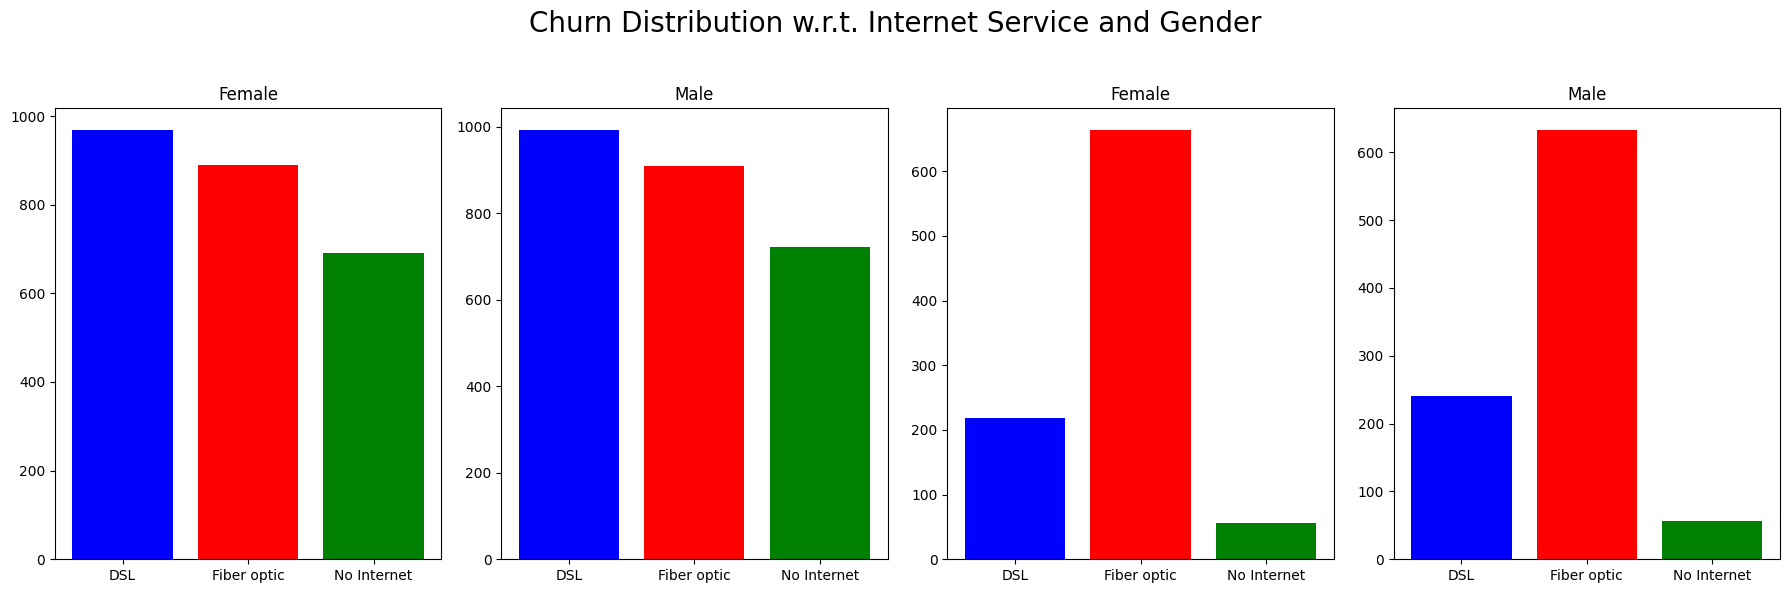

In [260]:
dsl = df[(df['InternetService'] == 'DSL') & (df['Churn'] == 'No') & (df['gender'] == 'Female')].shape[0]
dslm = df[(df['InternetService'] == 'DSL') & (df['Churn'] == 'No') & (df['gender'] == 'Male')].shape[0]

fo = df[(df['InternetService'] == 'Fiber optic') & (df['Churn'] == 'No') & (df['gender'] == 'Female')].shape[0]
fom = df[(df['InternetService'] == 'Fiber optic') & (df['Churn'] == 'No') & (df['gender'] == 'Male')].shape[0]

no = df[(df['InternetService'] == 'No') & (df['Churn'] == 'No') & (df['gender'] == 'Female')].shape[0]
nom = df[(df['InternetService'] == 'No') & (df['Churn'] == 'No') & (df['gender'] == 'Male')].shape[0]

sizes = [dsl,fo,no]
sizes1=[dslm,fom,nom]
labels = ['DSL','Fiber optic','No Internet']
plt.figure(figsize=(18,6))

plt.subplot(1,4,1)
plt.bar(labels,sizes,color=['blue','red','green'])
plt.title('Female')
plt.subplot(1,4,2)
plt.bar(labels,sizes1,color=['blue','red','green'])
plt.title('Male')


dsl1 = df[(df['InternetService'] == 'DSL') & (df['Churn'] == 'Yes') & (df['gender'] == 'Female')].shape[0]
dslm1 = df[(df['InternetService'] == 'DSL') & (df['Churn'] == 'Yes') & (df['gender'] == 'Male')].shape[0]

fo1 = df[(df['InternetService'] == 'Fiber optic') & (df['Churn'] == 'Yes') & (df['gender'] == 'Female')].shape[0]
fom1 = df[(df['InternetService'] == 'Fiber optic') & (df['Churn'] == 'Yes') & (df['gender'] == 'Male')].shape[0]

no1 = df[(df['InternetService'] == 'No') & (df['Churn'] == 'Yes') & (df['gender'] == 'Female')].shape[0]
nom1 = df[(df['InternetService'] == 'No') & (df['Churn'] == 'Yes') & (df['gender'] == 'Male')].shape[0]

sizes2 = [dsl1,fo1,no1]
sizes3=[dslm1,fom1,nom1]

plt.subplot(1,4,3)
plt.bar(labels,sizes2,color=['blue','red','green'])
plt.title('Female')
plt.subplot(1,4,4)
plt.bar(labels,sizes3,color=['blue','red','green'])
plt.title('Male')

# Main Titles
plt.suptitle('Churn Distribution w.r.t. Internet Service and Gender', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [261]:
import plotly.express as px
# A stacked bar plot is used to divide a main category into subcategories and display their contribution within them.

# Create a grouped DataFrame for counts
grouped_df = df.groupby(['Churn', 'PhoneService']).size().reset_index(name='count') # reset_index() converts the index into regular columns. The name='count' renames the values of the Series to 'count'.

# Create the stacked bar plot
fig = px.bar(grouped_df,
             x='Churn',
             y='count',
             color='PhoneService',
             color_discrete_map={'Yes': '#00CC99', 'No': '#B3DE69'},
             title="Churn distribution w.r.t. Phone Service")

# Update layout for better readability
fig.update_layout(
    title_x=0.5,  # Center the title
    legend_title="PhoneService",width=700,height=600
)

# Show the plot
fig.show()

#CONCLUSION: Most of the churned customers are those who have PhoneService.
#This insight could lead you to explore further: 1. Are there issues with the PhoneService? 2.Are PhoneService charges too high?

In [262]:
data = df.groupby(['Churn','PaperlessBilling']).size().reset_index(name='count')
fig = px.bar(data,x='Churn',y='count',color='PaperlessBilling',title="Churn distribution w.r.t. Paperless Billing",color_discrete_map={'Yes':'orange','No':'red'})
fig.update_layout(title_x=0.5,legend_title="PaperlessBilling",width=700,height=600)
fig.show()

# CONCLUSION: Customers with Paperless Billing are most likely to churn.

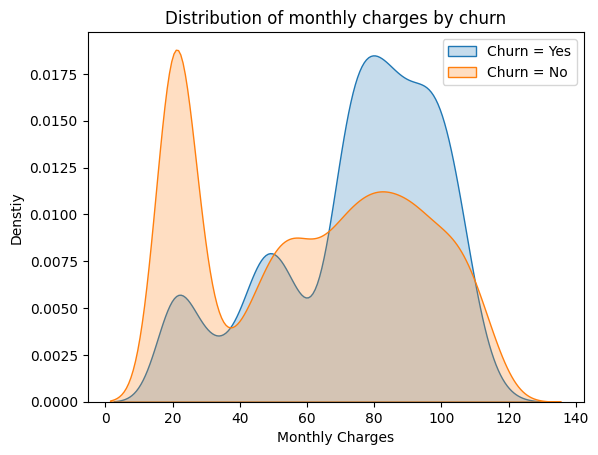

In [263]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning) # cmd to ignore warnings (since shade is depreciated)

# Convert 'TotalCharges' to numeric and handle errors
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'])

# Drop NaNs (if any)
df = df.dropna(subset=['MonthlyCharges'])

# Plot KDE - (Kernel Density Estimate) - used for displaying a continuous graph
sns.kdeplot(df.loc[df['Churn'] == 'Yes', 'MonthlyCharges'], label='Churn = Yes', shade=True) # df.loc is used to access a group of rows/cols. Ex: df.loc[2:5]--> Selects rows with index from 2 to 5 (inclusive)
sns.kdeplot(df.loc[df['Churn'] == 'No', 'MonthlyCharges'], label='Churn = No', shade=True)

plt.xlabel('Monthly Charges')
plt.ylabel('Denstiy')
plt.title('Distribution of monthly charges by churn')
plt.legend()
plt.show()
# CONCLUSION: Customers with higher Monthly Charges are also more likely to churn.

In [264]:
# Remember, everytime we need to change all the categorical data into numerical before normalising.

In [265]:
from sklearn.preprocessing import LabelEncoder
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
# Also removing the customerID column as it is not that important
df.drop(columns=['customerID'])

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [266]:
# training and testing of data
from sklearn.model_selection import train_test_split
features = df.drop(columns = ['Churn'])
target = df['Churn'].values
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.2,random_state=42)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(5634, 20) (5634,)
(1409, 20) (1409,)


In [267]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [268]:
# training the model - and for that I've chose LOGISTIC REGRESSION - since its the best one for classification purpose (i.e, whether customer will churn(leave) or not)
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [269]:
# now make prediction
y_pred = reg.predict(x_test_scaled)

In [270]:
# evaluate the model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.81


In [271]:
# MAKING OF Confusion Matrix
# A confusion matrix shows how well your model predicted each class by comparing predicted vs actual values

# True Positive (TP): Predicted "Yes" and it’s actually "Yes"
# True Negative (TN): Predicted "No" and it’s actually "No"
# False Positive (FP): Predicted "Yes" but it’s actually "No" (Type I error)
# False Negative (FN): Predicted "No" but it’s actually "Yes" (Type II error)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)


[[940  96]
 [165 208]]


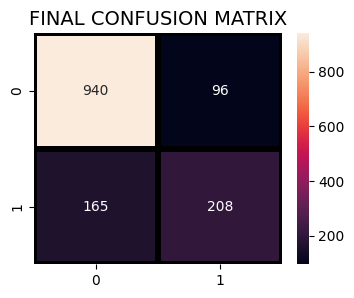

In [274]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred),annot=True,fmt = "d",linecolor="k",linewidths=3) # annot=True → Displays the values inside the heatmap cells , fmt = d -> means values inside box are decimal
# linecolor="k" → Sets the color of the grid lines between cells to black ("k" is shorthand for black in matplotlib).
plt.title("FINAL CONFUSION MATRIX",fontsize=14)
plt.show()

In [ ]:
# NOW LETS PREPARE A ---> ***Classification Report: report that gives you detailed performance metrics.
# ✅ Precision → Important when false positives are costly
# ✅ Recall → Important when missing true positives is costly
# ✅ F1-Score → Balances between precision and recall
# Metric	         Formula	                                        Meaning
# Precision	       TP / (TP + FP)	                                  Out of all predicted "Yes," how many were actually "Yes"?
# Recall	         TP / (TP + FN)	                                  Out of all actual "Yes," how many were correctly predicted?
# F1-Score	       2 × (Precision × Recall) / (Precision + Recall)	Harmonic mean of precision and recall (balance between them)
# Support	Number of actual cases for each class	Shows how balanced the dataset is

In [275]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.68      0.56      0.61       373

    accuracy                           0.81      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.81      0.81      1409



In [ ]:
# Explanation of Classification Report:

# - **Precision** → Out of the predicted positive cases, how many were actually correct?
#    → `0.85` for class 0 = 85% of predicted non-churn cases were correct.
#    → `0.68` for class 1 = 68% of predicted churn cases were correct.

# - **Recall** → Out of the actual positive cases, how many did the model catch?
#    → `0.91` for class 0 = 91% of actual non-churn cases were correctly identified.
#    → `0.56` for class 1 = 56% of actual churn cases were correctly identified.

# - **F1-Score** → Harmonic mean of precision and recall (balance between them).

# - **Support** → Number of actual cases for each class.
#    → `1036` for class 0 and `373` for class 1.

# - **Accuracy** → Overall correctness of the model → **81%**.
# - **Macro Avg** → Average of precision, recall, and F1-score across classes (unweighted).
# - **Weighted Avg** → Average of precision, recall, and F1-score, weighted by support (total cases).

# 👉 Thus, model is performing better at predicting **non-churn** cases than churn cases!